In [67]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow.keras.layers.experimental import preprocessing


In [68]:
train_dataset = image_dataset_from_directory('C:\VS Code\ECE379K Pill Identifier Model\Pill_Dataset', 
                validation_split = 0.2,
                subset= "training",
                seed = 123,
                labels = 'inferred',
                label_mode = 'int',
                image_size = [224, 224],
                interpolation = 'nearest',
                batch_size = 64,
                shuffle=True,
)

val_dataset = train_dataset = image_dataset_from_directory('C:\VS Code\ECE379K Pill Identifier Model\Pill_Dataset', 
                validation_split = 0.2,
                subset= "validation",
                seed = 123,
                labels = 'inferred',
                label_mode = 'int',
                image_size = [224, 224],
                interpolation = 'nearest',
                batch_size = 64,
                shuffle=True,
)

# train_dataset = image_dataset_from_directory('C:\VS Code\ECE379K Pill Identifier Model\Result', 
#                 validation_split = 0.2,
#                 subset= "training",
#                 seed = 123,
#                 labels = 'inferred',
#                 label_mode = 'int',
#                 image_size = [224, 224],
#                 interpolation = 'nearest',
#                 batch_size = 64,
#                 shuffle=True,
# )

# val_dataset = train_dataset = image_dataset_from_directory('C:\VS Code\ECE379K Pill Identifier Model\Result', 
#                 validation_split = 0.2,
#                 subset= "validation",
#                 seed = 123,
#                 labels = 'inferred',
#                 label_mode = 'int',
#                 image_size = [224, 224],
#                 interpolation = 'nearest',
#                 batch_size = 64,
#                 shuffle=True,
# )

Found 77 files belonging to 10 classes.
Using 62 files for training.
Found 77 files belonging to 10 classes.
Using 15 files for validation.


In [69]:
class_names = train_dataset.class_names
#print(class_names)

In [70]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

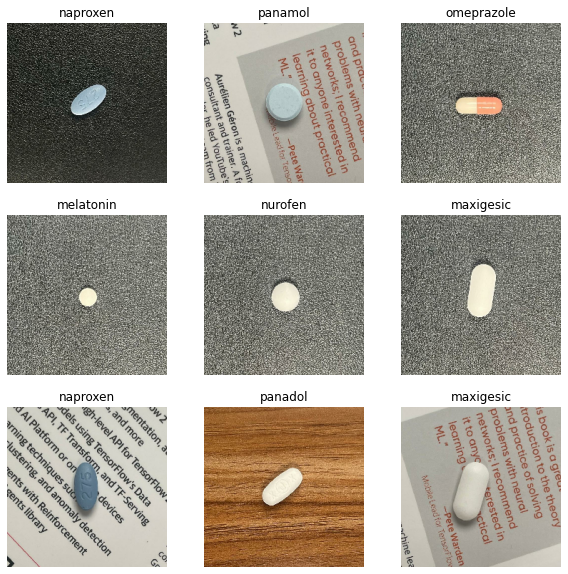

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [72]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5")
hub_layer.trainable = False

In [73]:
num_classes = len(class_names)
model = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(224, 224, 3)),
        #layers.Resizing(224, 224),
        #preprocessing.RandomWidth(factor=0.15), # horizontal stretch
        #preprocessing.RandomRotation(factor=0.20),
        #preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        hub_layer,
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
        ])
model.build([None, 224, 224, 3])


In [20]:
# num_classes = len(class_names)

# model = Sequential([
#   layers.Rescaling(1./255, input_shape=(640, 640, 3)),
#   layers.Resizing(224, 224),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [74]:
#optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [75]:
epochs=40
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/40
1/1 [==============================] - 13s 13s/step - loss: 4.1117 - accuracy: 0.0667 - val_loss: 2.4903 - val_accuracy: 0.2000
Epoch 2/40
1/1 [==============================] - 1s 1s/step - loss: 2.7172 - accuracy: 0.2667 - val_loss: 1.4593 - val_accuracy: 0.6000
Epoch 3/40
1/1 [==============================] - 1s 1s/step - loss: 1.5367 - accuracy: 0.4667 - val_loss: 0.8550 - val_accuracy: 0.8000
Epoch 4/40
1/1 [==============================] - 1s 1s/step - loss: 1.1215 - accuracy: 0.6000 - val_loss: 0.5602 - val_accuracy: 0.8000
Epoch 5/40
1/1 [==============================] - 1s 1s/step - loss: 0.6389 - accuracy: 0.8000 - val_loss: 0.4149 - val_accuracy: 0.8667
Epoch 6/40
1/1 [==============================] - 1s 1s/step - loss: 0.7498 - accuracy: 0.6667 - val_loss: 0.3040 - val_accuracy: 0.9333
Epoch 7/40
1/1 [==============================] - 1s 1s/step - loss: 0.4210 - accuracy: 0.8667 - val_loss: 0.2245 - val_accuracy: 1.0000
Epoch 8/40
1/1 [=======================

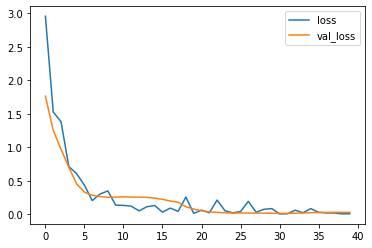

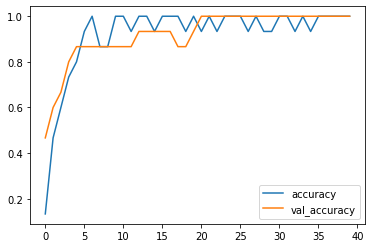

In [64]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

1/1 [==============================] - 2s 2s/step
(1, 10)
[[ 2.6480162 -7.069538   2.1278217 -2.1011784 -3.0797744 -1.4494205
  14.099614  -1.5918753 -2.6893828 -4.1150455]]
tf.Tensor(
[1.0632282e-05 6.4024591e-10 6.3198836e-06 9.2061427e-08 3.4600227e-08
 1.7665775e-07 9.9998248e-01 1.5320228e-07 5.1123827e-08 1.2287564e-08], shape=(10,), dtype=float32)
0.9999825
This pill is most likely a omeprazole with a 100.00 percent confidence


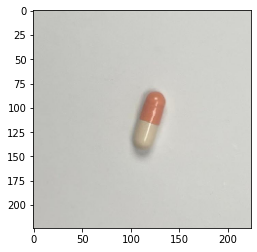

In [ ]:
from PIL import Image
import numpy as np

image_path = "C:\VS Code\test\predict"
test_image = tf.keras.utils.load_img("C:/VS Code/test/predict.jpg", target_size = (224, 224))
plt.imshow(test_image)
test_image_ary = tf.keras.utils.img_to_array(test_image)
test_image_ary = tf.expand_dims(test_image_ary, 0)
#print(test_image_ary.shape)

predictions = model.predict(test_image_ary)
score = tf.nn.softmax(predictions[0])
print(predictions.shape)
print(predictions)
print(score)
print(np.max(score))
print("This pill is most likely a {} with a {:.2f} percent confidence" .format(class_names[np.argmax(score)], 100 * np.max(score)))

In [25]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002C2CF0945E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002C2CF0945E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002C2CF0945E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: C:\Users\Joshd\AppData\Local\Temp\tmpgyaub3bg\assets


INFO:tensorflow:Assets written to: C:\Users\Joshd\AppData\Local\Temp\tmpgyaub3bg\assets


In [66]:
model.save("model_other_dataset")

INFO:tensorflow:Assets written to: model_other_dataset\assets


INFO:tensorflow:Assets written to: model_other_dataset\assets
